# Dataset Exploration

## Imports

In [3]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [4]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [5]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler

## Load Data

In [6]:
categories_path = '../data/categories.npy'
data_path = '../data/training_data.npy'
valid_path = '../data/valid_periods.npy'
categories = np.load(categories_path, allow_pickle=True)
data = np.load(data_path, allow_pickle=True)
valid = np.load(valid_path, allow_pickle=True)
print('Data loaded')

Data loaded


## Values Inspection

In [7]:
print(f'categories: {categories.shape} , {type(categories)}, \ndata: {data.shape}, {type(data)}, \nvalid: {valid.shape}, {type(valid)}')

categories: (48000,) , <class 'numpy.ndarray'>, 
data: (48000, 2776), <class 'numpy.ndarray'>, 
valid: (48000, 2), <class 'numpy.ndarray'>


we have 3 sets of values:
-   **categories**: 48'000 labels 
-   **data**: 48'000 time-series, each one has 2776 observations that ranges from 0 to 1
-   **valid**: possibly it's the valid interval to take into consideration in the time series in data

### See different values in categories

In [8]:
unique_categories = np.unique(categories)
unique_categories

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype='<U1')

In [9]:
# print the frequency of each category
unique, counts = np.unique(categories, return_counts=True)
dict(zip(unique, counts))
print(f'unique: {unique}, \ncounts: {counts}')

unique: ['A' 'B' 'C' 'D' 'E' 'F'], 
counts: [ 5728 10987 10017 10016 10975   277]


## Plot Data

In [10]:
## plot a given sample from a dataset
def inspect_data(data, i):
    plt.figure(figsize=(17, 7))
    plt.title(f'Category: {categories[i]}')
    plt.plot(data[i])

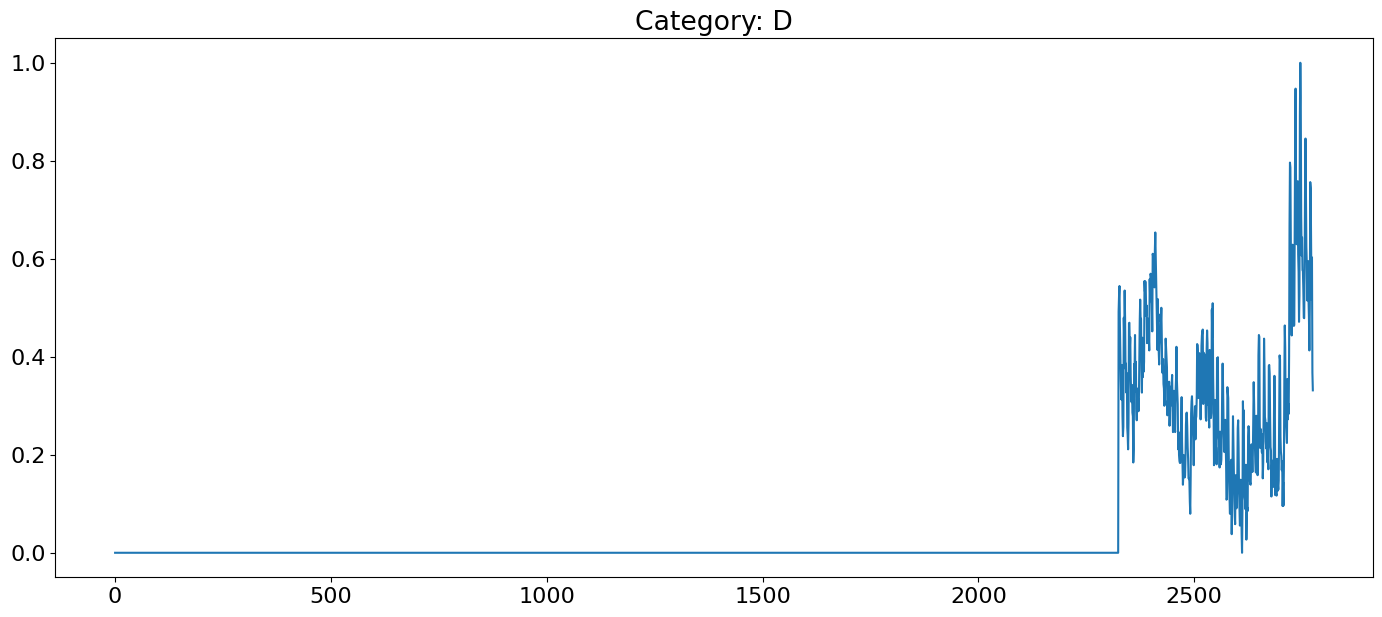

In [11]:
inspect_data(data, 0)

> !!! It seems that valid tells us what's the valid interval to take into consideration in data

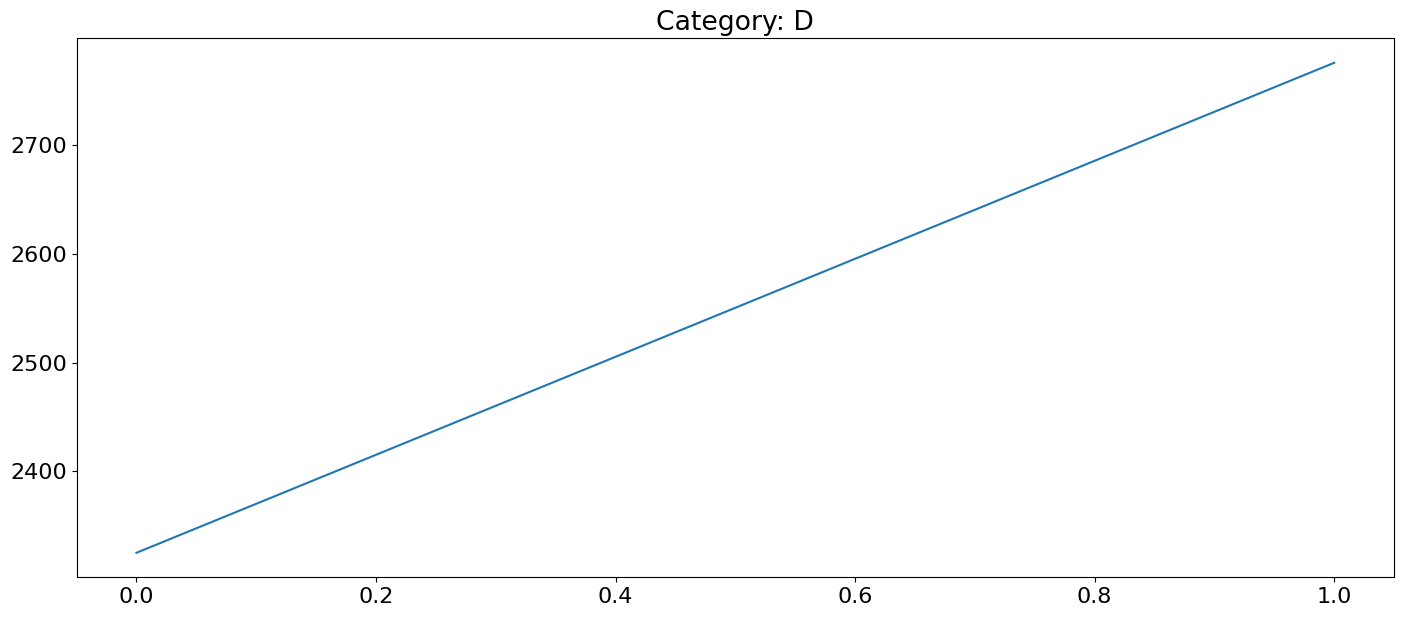

In [12]:
inspect_data(valid, 0)

In [13]:
def inspect_data_range(data, i):
    plt.figure(figsize=(17, 7))
    print(f'shape: {data[i].shape}')
    
    x_values = range(valid[i][0], valid[i][-1])
    print(f'actual time-series-length: {len(x_values)}')
    print(f'first valid index: {valid[i][0]} \nlast valid index: {valid[i][-1]}')
    plt.plot(x_values, data[i][valid[i][0]:valid[i][-1]])
    plt.title(f'Category: {categories[i]}')
    
    plt.show()

shape: (2776,)
actual time-series-length: 94
first valid index: 2682 
last valid index: 2776


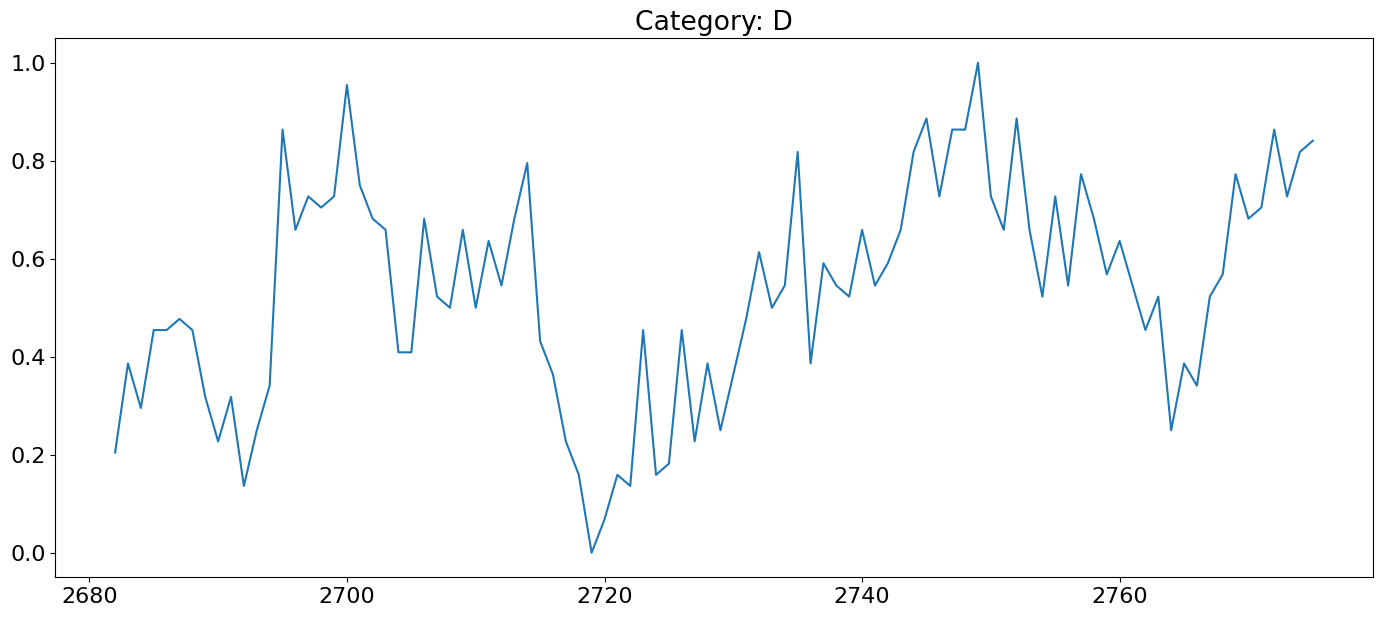

In [14]:
inspect_data_range(data, 4)

shape: (2776,)
actual time-series-length: 451
first valid index: 2325 
last valid index: 2776


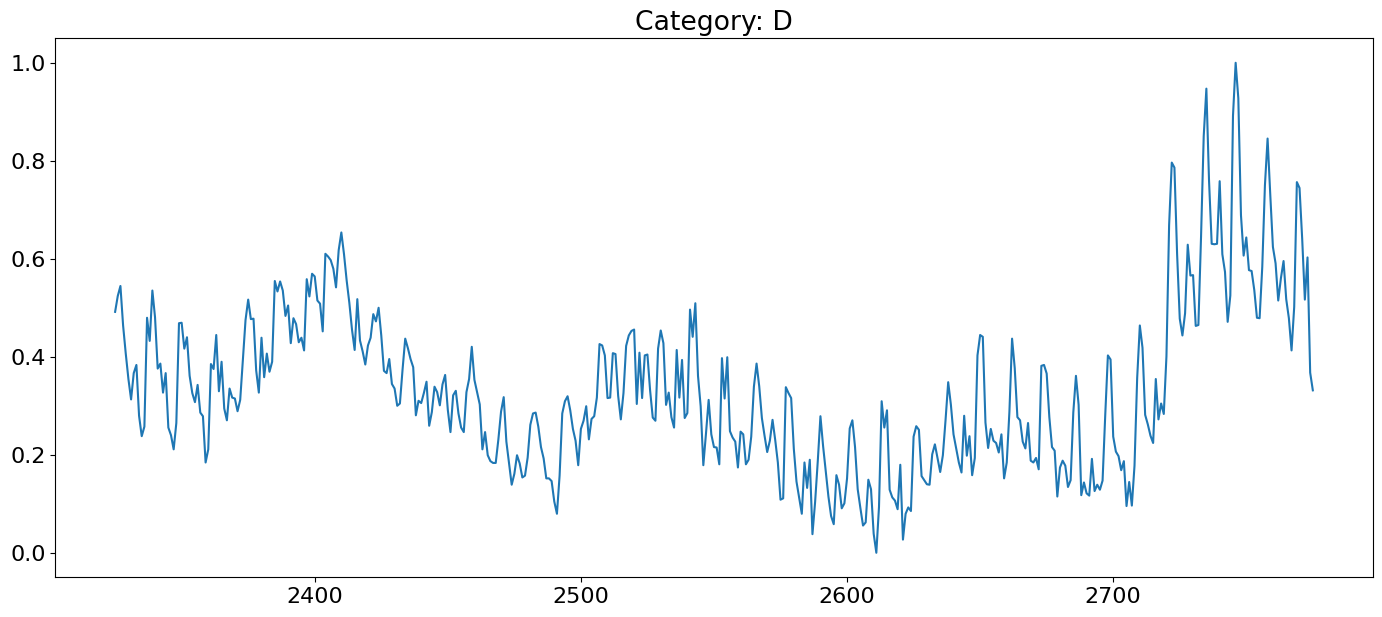

In [15]:
inspect_data_range(data, 0)

so we have different time-series with different lengths (see ```inspect_data_range(data, 4)``` and ```inspect_data_range(data, 0)```)

In [65]:
def inspect_data_by_category(data, category, size):
    fig, axs = plt.subplots(size, 1, figsize=(20, 2*size))
    
    i = 0
    count = 0
    # Flatten the array of axes
    axs = axs.flatten()
    
    while (i < size):
        # do a subplot
        if(categories[count] == category):
            print(f'\nshape: {data[count].shape}')

            x_values = range(valid[count][0], valid[count][-1])
            print(f'actual time-series-length: {len(x_values)}')
            print(f'first valid index: {valid[count][0]} \nlast valid index: {valid[count][-1]}')
            axs[i].plot(data[count])
            axs[i].set_title(f'Category: {categories[count]}')
            #add a vertical red line where the valid data starts and ends
            axs[i].axvline(valid[count][0], color='r', linestyle='--')
            axs[i].axvline(valid[count][-1], color='r', linestyle='--')
            plt.subplots_adjust(hspace=0.7)

            axvspace = 0.5

            i += 1
        count += 1
    #Set a specific range to pirint
    
    plt.show()


shape: (2776,)
actual time-series-length: 660
first valid index: 2116 
last valid index: 2776

shape: (2776,)
actual time-series-length: 774
first valid index: 2002 
last valid index: 2776

shape: (2776,)
actual time-series-length: 767
first valid index: 2009 
last valid index: 2776

shape: (2776,)
actual time-series-length: 659
first valid index: 2117 
last valid index: 2776

shape: (2776,)
actual time-series-length: 287
first valid index: 2489 
last valid index: 2776

shape: (2776,)
actual time-series-length: 156
first valid index: 2620 
last valid index: 2776

shape: (2776,)
actual time-series-length: 156
first valid index: 2620 
last valid index: 2776

shape: (2776,)
actual time-series-length: 156
first valid index: 2620 
last valid index: 2776

shape: (2776,)
actual time-series-length: 156
first valid index: 2620 
last valid index: 2776

shape: (2776,)
actual time-series-length: 151
first valid index: 2625 
last valid index: 2776


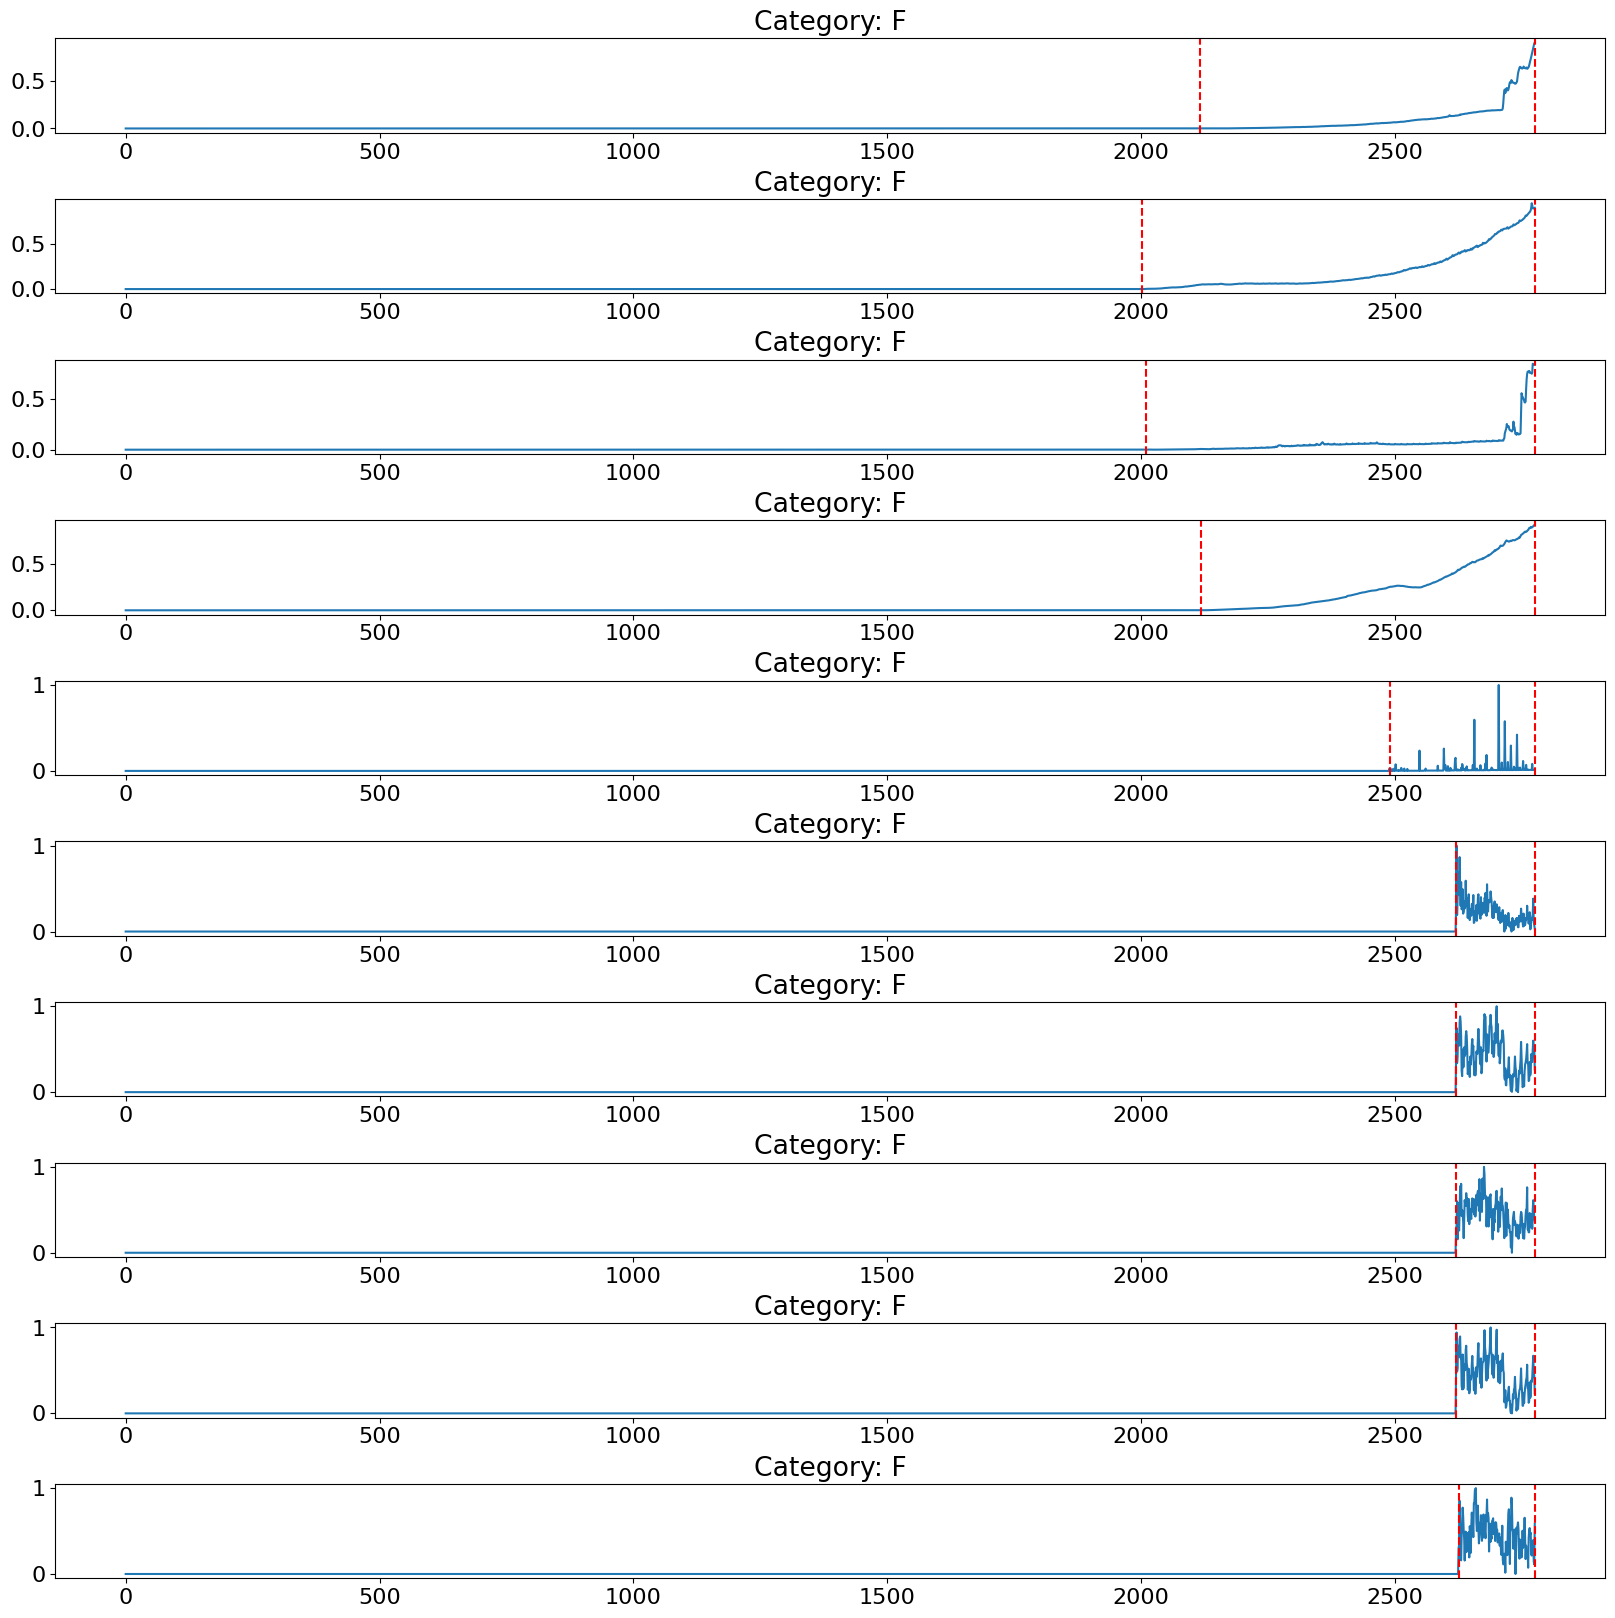

In [69]:
inspect_data_by_category(data, 'F', 10)